In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
##import gz

>1. samples collection
>2. mutaitonal landscape of DYS and Primary tumors
>3. copy number variations
>4. mutational signatures 
>5. pathway analyses

In [4]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [5]:
tumor_to_normal = {}
tumor_list = []

for line in open("/lustre/home/yzhou/GC_multi/GC_30/GC_Zhouyong/GC2/somatic/pair.list"):
    normal,tumor = line.strip().split("\t")
    #print(normal,tumor)
    tumor_to_normal[tumor] = normal
    tumor_list.append(tumor)

In [6]:
samples_summary = []

for line in open("/lustre/home/yzhou/GC_multi/GC_30/GC_Zhouyong/GC2/analysis/info.list"):
    for file in open(line.strip()):
        samples_summary.append(file.strip().split("\t")[0])
    break


In [7]:
samples_summary = pd.DataFrame(index=samples_summary)

In [8]:
for line in open("/lustre/home/yzhou/GC_multi/GC_30/GC_Zhouyong/GC2/analysis/info.list"):
    sn = line.strip().split("/")[-3]
    info = []
    for file in open(line.strip()):
        info.append(file.strip().split("\t")[1])
    
    samples_summary[sn] = info

In [9]:
samples_summary = samples_summary.T
samples_summary.pop("Sample")

11-DYS    11-DYS
11-N        11-N
11-T        11-T
12-DYS    12-DYS
12-N        12-N
12-T        12-T
13-DYS    13-DYS
13-N        13-N
13-T        13-T
15-DYS    15-DYS
15-N        15-N
15-T        15-T
16-DYS    16-DYS
16-N        16-N
16-T        16-T
17-DYS    17-DYS
17-N        17-N
17-T        17-T
18-DYS    18-DYS
18-N        18-N
18-T        18-T
19-DYS    19-DYS
19-N        19-N
19-T        19-T
1-Dys      1-Dys
1-N          1-N
1-T          1-T
20-DYS    20-DYS
20-N        20-N
20-T        20-T
21-DYS    21-DYS
21-N        21-N
21-T        21-T
22-DYS    22-DYS
22-N        22-N
22-T        22-T
24-DYS    24-DYS
24-N        24-N
24-T        24-T
25-DYS    25-DYS
25-N        25-N
25-T        25-T
26-DYS    26-DYS
26-N        26-N
26-T        26-T
27-DYS    27-DYS
27-N        27-N
27-T        27-T
28-DYS    28-DYS
28-N        28-N
28-T        28-T
2-DYS      2-DYS
2-N          2-N
2-T          2-T
30-DYS    30-DYS
30-N        30-N
30-T        30-T
31-DYS    31-DYS
31-N        31

In [10]:
samples_summary.replace({'\%':""},inplace=True,regex=True)

In [11]:
samples_summary = samples_summary.astype("float")

In [12]:
samples_summary["tissue"] = "dys"

In [13]:
samples_summary.loc[samples_summary.index.str.contains("-N"),"tissue"] = "normal"

samples_summary.loc[samples_summary.index.str.contains("-T"),"tissue"] = "tumor"

In [172]:
figure_dir = "/lustre/home/yzhou/GC_multi/GC_30/GC_Zhouyong/GC2/figures/"

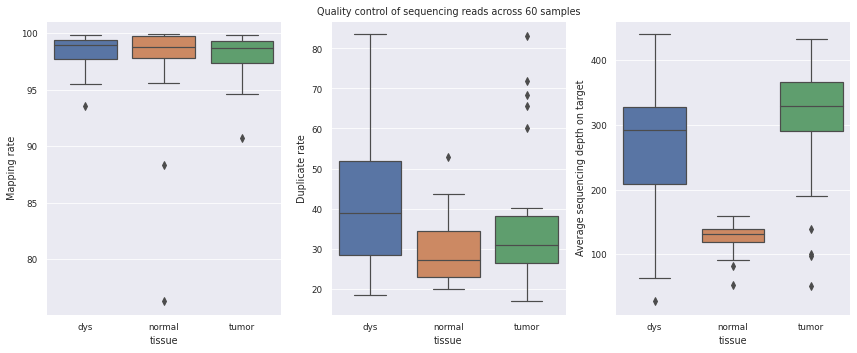

In [231]:
sns.set_theme("paper")
fig,ax = plt.subplots(1,3,figsize=(12,5))
sns.boxplot(y="Average sequencing depth on target",x="tissue",data=samples_summary,ax=ax[2])
sns.boxplot(y="Mapping rate",x="tissue",data=samples_summary,ax=ax[0])
sns.boxplot(y="Duplicate rate",x="tissue",data=samples_summary,ax=ax[1])


ax[1].set_title("Quality control of sequencing reads across 60 samples")

plt.tight_layout()
plt.rcParams['pdf.fonttype'] = 42
plt.savefig(figure_dir + "Supplementary Figure1.pdf",bbox_inches="tight")

## Mutations

In [15]:
useful_titles = ["Hugo_Symbol","Chromosome","Start_position","End_position","Strand",
                "Variant_Classification","Variant_Type","Reference_Allele","Tumor_Seq_Allele1","Tumor_Seq_Allele2",\
                "dbSNP_RS","Tumor_Sample_Barcode","Matched_Norm_Sample_Barcode","Genome_Change","Annotation_Transcript","Transcript_Strand",\
                "cDNA_Change","Codon_Change","Protein_Change","DrugBank","ref_context","ExAC_clinvar_pathogenic",
                "Description","UniProt_Natural_Variations",\
                "ClinVar_rs","ClinVar_ASSEMBLY","ClinVar_HGMD_ID","ClinVar_SYM","ClinVar_TYPE"]

In [16]:
mutations = pd.read_csv("/lustre/home/yzhou/GC_multi/GC_30/GC_Zhouyong/GC2/somatic/Mutect2/combined_mutations.maf",sep="\t",skiprows=3,
                        usecols=useful_titles + ["n_alt_count","n_ref_count","t_alt_count","t_ref_count"])

/lustre/home/yzhou/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (51,122) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [222]:
mutations.to_csv(figure_dir+"table2.csv",index=False,sep="\t")

In [17]:
nonsy_mu = ["De_novo_Start_InFrame","De_novo_Start_OutOfFrame","Frame_Shift_Del","Frame_Shift_Ins",\
           "In_Frame_Del","In_Frame_Ins","Missense_Mutation","Nonsense_Mutation","Nonstop_Mutation",\
           "Splice_Site","Start_Codon_Del","Start_Codon_Ins","Start_Codon_SNP","Stop_Codon_Del","Stop_Codon_Ins"]


inactivating_mu = ["De_novo_Start_InFrame","De_novo_Start_OutOfFrame","Frame_Shift_Del","Frame_Shift_Ins",\
           "In_Frame_Del","In_Frame_Ins","Nonsense_Mutation","Nonstop_Mutation",\
           "Splice_Site","Start_Codon_Del","Start_Codon_Ins","Start_Codon_SNP","Stop_Codon_Del","Stop_Codon_Ins"]

In [18]:
mutations["vaf"] = mutations["t_alt_count"]/(mutations["t_alt_count"] + mutations["t_ref_count"])

In [19]:
mutations["Tumor_Sample_Barcode"] = mutations["Tumor_Sample_Barcode"].str.upper()

In [20]:
ci = pd.DataFrame(index=["DYS_mu","com_mu","T_mu"])

In [21]:
alig_on = ["Hugo_Symbol",'Chromosome', 'Start_position', 'End_position', 'Strand', 'Variant_Classification', 
 'Variant_Type', 'Reference_Allele', 'Tumor_Seq_Allele1', 'Tumor_Seq_Allele2', 'dbSNP_RS',
'Matched_Norm_Sample_Barcode', 'Genome_Change', 'Annotation_Transcript', 
 'Transcript_Strand', 'cDNA_Change', 'Codon_Change', 'Protein_Change', 'Description', 'UniProt_Natural_Variations',
 'DrugBank', 'ref_context', 'ClinVar_ASSEMBLY', 'ClinVar_HGMD_ID', 
 'ClinVar_SYM', 'ClinVar_TYPE', 'ClinVar_rs','ExAC_clinvar_pathogenic']

In [22]:
mut_align = pd.DataFrame()
for patient_id in set(mutations["Tumor_Sample_Barcode"].apply(lambda x: x.split("-")[0])):
    ix_dys = mutations["Tumor_Sample_Barcode"] == (patient_id+"-DYS")
    ix_tumor = mutations["Tumor_Sample_Barcode"] == (patient_id+"-T")
    mutations_dys = mutations[ix_dys]
    mutations_tumor = mutations[ix_tumor]
    if mut_align.shape[0] == 0:
        mut_align = mutations_dys.merge(mutations_tumor,left_on=alig_on,right_on=alig_on,
                       how="outer")
    else:
        mut_align = pd.concat([mut_align,mutations_dys.merge(mutations_tumor,left_on=alig_on,right_on=alig_on,how="outer")])
    
    #print("shared")
    mutations_align = mutations_dys.merge(mutations_tumor,left_on=alig_on,right_on=alig_on,
                       how="outer")
    mut_shared = mutations_align[~(mutations_align["vaf_x"].isna() | mutations_align["vaf_y"].isna())].shape[0]
    ci["GC_"+patient_id] = [mutations_dys.shape[0] - mut_shared,mut_shared,mutations_tumor.shape[0]-mut_shared]    
    

In [23]:
##sort by mu number
ind = np.argsort(-ci.sum(axis=0))

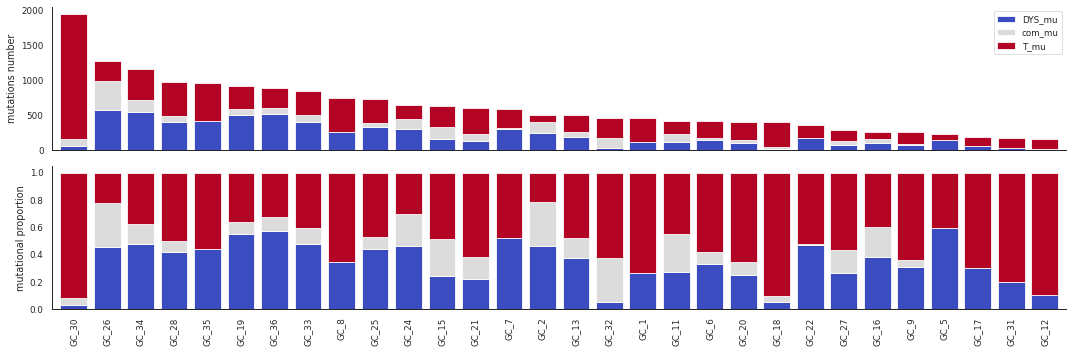

In [183]:
sns.set_style("white")

fig, ax = plt.subplots(2,1,figsize=(15,10),sharex=True)

ci.iloc[:,ind].T.plot.bar(stacked=True,width=0.8,figsize=(15,5),cmap="coolwarm",ax=ax[0])

(ci.iloc[:,ind]/ci.iloc[:,ind].sum(axis=0)).T.plot.bar(stacked=True,width=0.8,figsize=(15,5),cmap="coolwarm",legend=False,ax=ax[1])

sns.despine(ax=ax[0])
sns.despine(ax=ax[1])


ax[0].set_ylabel("mutations number")

ax[1].set_ylabel("mutational proportion")
plt.tight_layout()

plt.rcParams['pdf.fonttype'] = 42
plt.savefig(figure_dir + "Figure1AB.pdf")

In [154]:
(ci.iloc[:,ind]/ci.iloc[:,ind].sum(axis=0)).T.sort_values(by="com_mu").median()

DYS_mu    0.358895
com_mu    0.088616
T_mu      0.511965
dtype: float64

<AxesSubplot:>

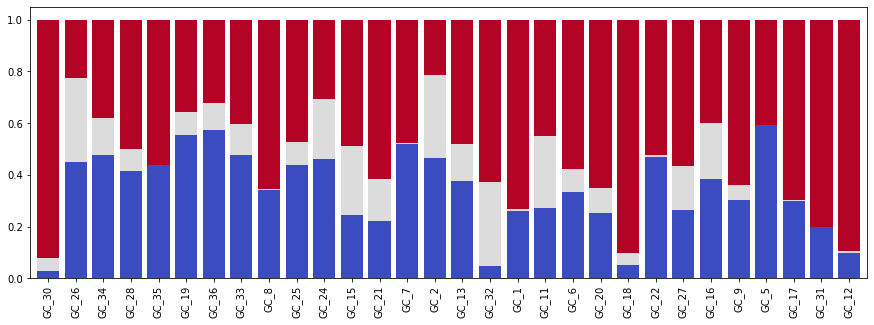

In [25]:
(ci.iloc[:,ind]/ci.iloc[:,ind].sum(axis=0)).T.plot.bar(stacked=True,width=0.8,figsize=(15,5),cmap="coolwarm",legend=False)

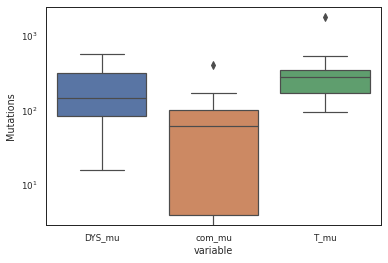

In [184]:
ax = sns.boxplot(x="variable",y="value",data=ci.T.melt())
ax.set_yscale('log')
ax.set_ylabel("Mutations ")

plt.rcParams['pdf.fonttype'] = 42
plt.savefig(figure_dir + "Supplementary_Figure2.pdf")

### Driver genes

In [30]:
cancer_gene_set = pd.read_csv("/lustre/home/yzhou/ESCC/final_out/allOnco_May2018.tsv",sep="\t")["refSeqName"].tolist()

In [31]:
ix2 = mut_align["Variant_Classification"].isin(nonsy_mu)
ix3 = mut_align["Variant_Classification"].isin(inactivating_mu)

In [32]:
GC_gene_set = ["TP53","CDH1","SMAD4","PIK3CA","RHOA","ARID1A","KRA","MUC6","APC","BCOR","EYA4","BNC2","RNF43","ABCA10",
               "CTNNB1","MACF1","SMAD2","SOHLH2","RASA1","FAM46D","PLB1","CNGA4","EIF2C4","ERBB2","PTPRC"]

In [33]:
cancer_mutations = mut_align[ix2][mut_align[ix2]["Hugo_Symbol"].isin(GC_gene_set)]

In [34]:
cancer_mutations["status"] = "dys_priate"

cancer_mutations.loc[cancer_mutations["vaf_x"].isna() & (~cancer_mutations["vaf_y"].isna()),"status"] = "tumor_private"

cancer_mutations.loc[(~cancer_mutations["vaf_x"].isna()) & (~cancer_mutations["vaf_y"].isna()),"status"] = "trunk"

In [75]:
all_mutations = mut_align[ix2]

In [76]:
all_mutations["status"] = "dys_priate"

all_mutations.loc[all_mutations["vaf_x"].isna() & (~all_mutations["vaf_y"].isna()),"status"] = "tumor_private"

all_mutations.loc[(~all_mutations["vaf_x"].isna()) & (~all_mutations["vaf_y"].isna()),"status"] = "trunk"

/lustre/home/yzhou/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/lustre/home/yzhou/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


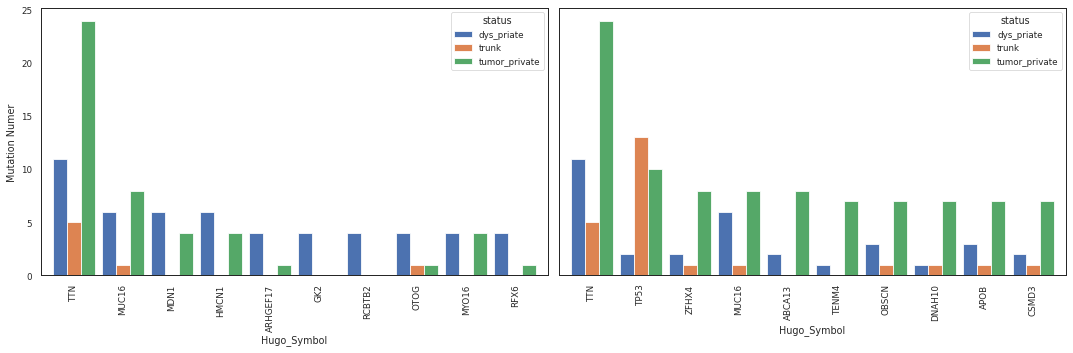

In [195]:
fig,ax = plt.subplots(1,2,figsize=(15,5),sharey=True)

all_mutations.groupby(["Hugo_Symbol","status"])["status"].agg("count").unstack().sort_values(by="trunk",ascending=False).\
sort_values(by="dys_priate",ascending=False).iloc[0:10].plot.bar(width=0.85,ax=ax[0])

all_mutations.groupby(["Hugo_Symbol","status"])["status"].agg("count").unstack().sort_values(by="trunk",ascending=False).\
sort_values(by="tumor_private",ascending=False).iloc[0:10].plot.bar(width=0.85,ax=ax[1])


ax[0].set_ylabel("Mutation Numer")
plt.tight_layout()

plt.rcParams['pdf.fonttype'] = 42
plt.savefig(figure_dir + "Figure2C.pdf")


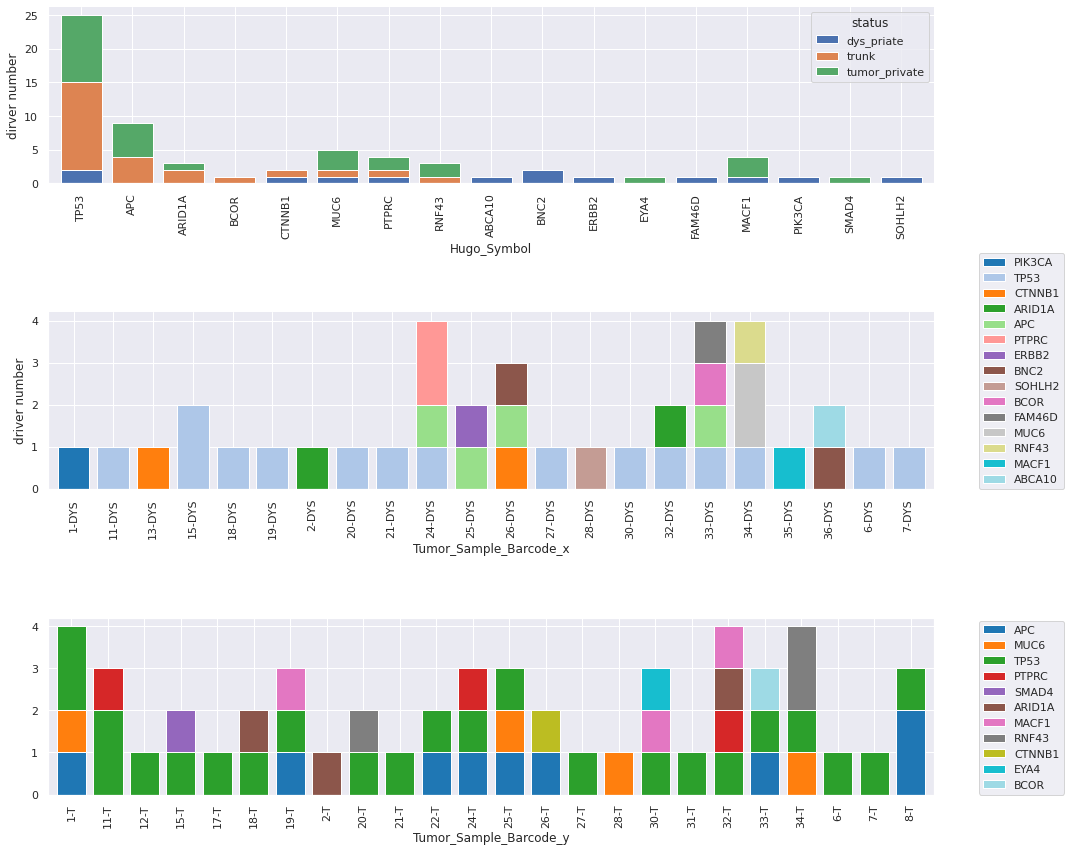

In [213]:
fig,ax = plt.subplots(3,1,figsize=(15,12))

cancer_mutations.groupby(["Hugo_Symbol","status"])["status"].agg("count").unstack().sort_values(by="trunk",ascending=False)\
.plot.bar(stacked=True,width=0.8,ax=ax[0])

sns.despine(ax=ax[0])

cancer_mutations.groupby(["Tumor_Sample_Barcode_x","Hugo_Symbol"])["Tumor_Sample_Barcode_x"].agg("count").unstack()\
.plot.bar(stacked=True,width=0.8,cmap="tab20",ax=ax[1])

ax[1].legend(loc=(1.05,0.0))

sns.despine(ax=ax[1])

ax[0].set_ylabel("dirver number")
ax[1].set_ylabel("driver number")


cancer_mutations.groupby(["Tumor_Sample_Barcode_y","Hugo_Symbol"])["Tumor_Sample_Barcode_y"].agg("count").unstack()\
.plot.bar(stacked=True,width=0.8,cmap="tab20",ax=ax[2])

ax[2].legend(loc=(1.05,0.0))

plt.tight_layout()
plt.rcParams['pdf.fonttype'] = 42
plt.savefig(figure_dir + "Supplementary Figure3.pdf")

In [158]:
cancer_mutations.groupby(["Tumor_Sample_Barcode_x","Hugo_Symbol"])["Tumor_Sample_Barcode_x"].agg("count").sum()

37

In [156]:
cancer_mutations.groupby(["Tumor_Sample_Barcode_y","Hugo_Symbol"])["Tumor_Sample_Barcode_y"].agg("count").sum()

52

In [163]:
np.unique(cancer_mutations["status"],return_counts=True)

(array(['dys_priate', 'trunk', 'tumor_private'], dtype=object),
 array([13, 24, 28]))

In [166]:
28/(24+13+28)

0.4307692307692308

In [38]:
sn_to_gene = pd.DataFrame(index=np.sort(list(set(mutations["Tumor_Sample_Barcode"]))),columns = GC_gene_set)
for i,line in cancer_mutations.iterrows():
    if line["status"] == "dys_priate":
        sn_to_gene.loc[line["Tumor_Sample_Barcode_x"],line["Hugo_Symbol"]] = line["Variant_Classification"]
    elif line["status"] == "tumor_private":
        sn_to_gene.loc[line["Tumor_Sample_Barcode_y"],line["Hugo_Symbol"]] = line["Variant_Classification"]
    else:
        sn_to_gene.loc[line["Tumor_Sample_Barcode_x"],line["Hugo_Symbol"]] = line["Variant_Classification"]
        sn_to_gene.loc[line["Tumor_Sample_Barcode_y"],line["Hugo_Symbol"]] = line["Variant_Classification"]
                

In [39]:
sn_to_gene.fillna("wild",inplace=True)

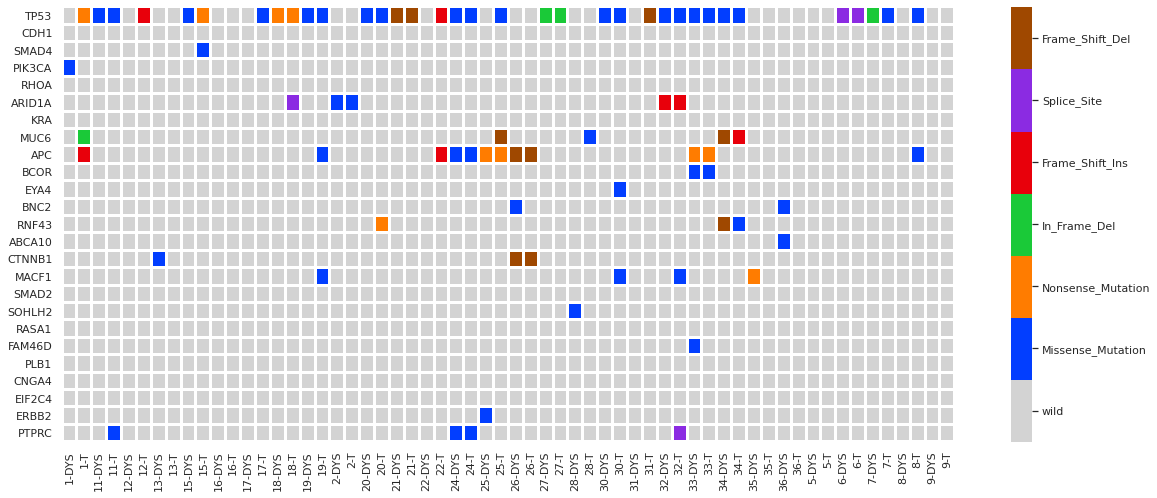

In [203]:
## plotting heatmap
#sn_colors_sub = sn_colors.iloc[0:917,6:30]
value_to_int = {j:i for i,j in enumerate(pd.unique(sn_to_gene.values.ravel()))}
n = len(value_to_int)
cmap = sns.color_palette("Pastel2")


sns.set(font_scale=1)
fig,ax = plt.subplots(figsize=(20,8))

cmap = []
cmap.append("lightgrey")
for col in sns.color_palette("bright",n-1):
    cmap.append(col)

ax1 = sns.heatmap(sn_to_gene.replace(value_to_int).T,cmap=cmap,ax=ax,linecolor="white",xticklabels=True,\
                  linewidths=2)

#modify colorbar:
colorbar = ax1.collections[0].colorbar
r = colorbar.vmax - colorbar.vmin
colorbar.set_ticks([colorbar.vmin + r/n*(0.5+i) for i in range(n)])
colorbar.set_ticklabels(list(value_to_int.keys()))
##plt.show()

plt.rcParams['pdf.fonttype'] = 42
plt.savefig(figure_dir + "Figure2.pdf")

### Copy number variations

In [42]:
seg = pd.read_csv("/lustre/home/yzhou/GC_multi/GC_30/GC_Zhouyong/GC2/somatic/CNV/Tumor/combined.seg",sep="\t")

In [43]:
amp_genes = ""
del_genes = ""

for line in open("/lustre/home/yzhou/GC_multi/GC_driver_alteration/Amp_del.gmt"):
    if re.search("Amp",line):
        amp_genes = line.strip().split("\t")[2:]
    elif re.search("Del",line):
        del_genes = line.strip().split("\t")[2:]

### arm-level comparison

In [44]:
arm_level = pd.read_csv("/lustre/home/yzhou/GC_multi/GC_30/GC_Zhouyong/GC2/somatic/CNV/Tumor/gistic2_result/broad_values_by_arm.txt",sep="\t",
           index_col=0)

In [45]:
arm_level[arm_level > 0.1] = 1
arm_level[(arm_level <= 0.1) & (arm_level > -0.1)] = 0
arm_level[arm_level < -0.1] = -1

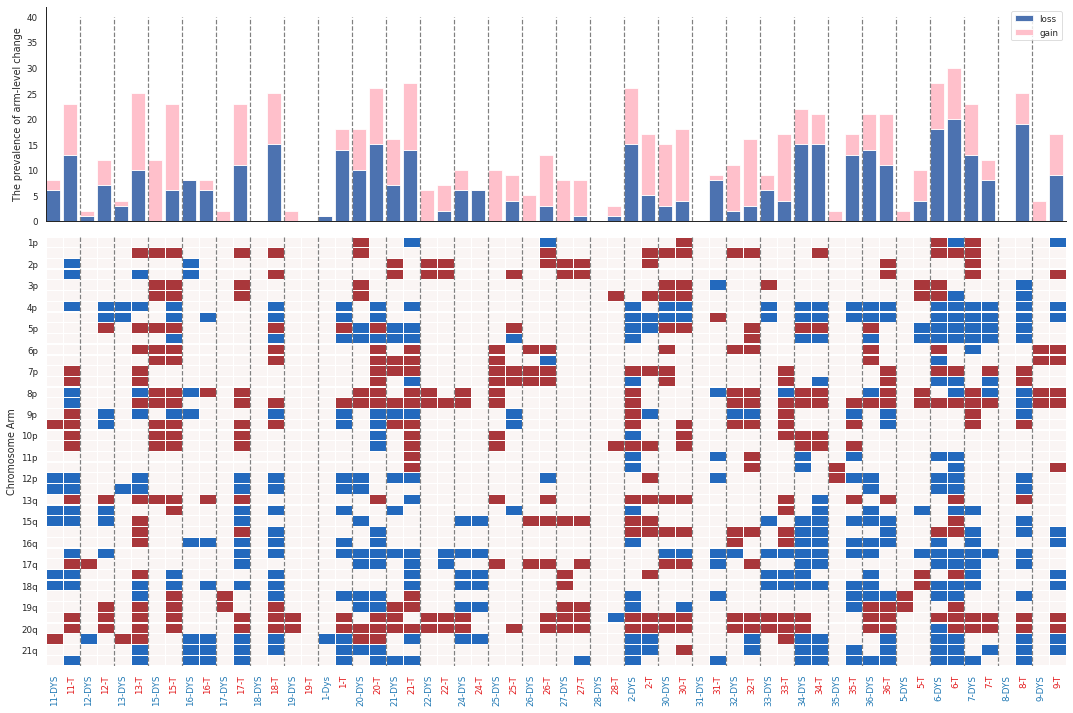

In [216]:
### Figure 3A

sns.set_theme("paper")
sns.set_style("white")
fig,ax = plt.subplots(2,1,figsize=(15,10),gridspec_kw={'height_ratios':[1,2]}) #,'width_ratios':[30,1]})

ax[0].bar(np.arange(60),arm_level.apply(lambda x: np.sum(x==-1)),label="loss")
ax[0].bar(np.arange(60),arm_level.apply(lambda x: np.sum(x==1)),bottom=arm_level.apply(lambda x: np.sum(x==-1)),color="pink",label="gain")
##ax[0].axis("off")

ax[0].legend(["loss","gain"])

ax[0].set_xlim(ax[0].patches[0].get_x(),ax[0].patches[-1].get_x()+1)

ax[0].set_xticklabels("")

sns.despine(ax=ax[0])

ax[0].vlines(np.arange(2,60,2) - 0.4 ,ymin= 0 ,ymax=40,color="grey",linestyles="dashed")

ax[0].set_ylabel("The prevalence of arm-level change")

sns.heatmap(arm_level,cmap="vlag",ax=ax[1],cbar=False,linewidths=.3)

ax[1].vlines(np.arange(2,60,2),ymin= 0 ,ymax=40,color="grey",linestyles="dashed")


for i,t in enumerate(ax[1].xaxis.get_ticklabels()):
    if i%2 == 0:
        t.set_color(sns.color_palette("Paired")[1])
    else:
        t.set_color(sns.color_palette("Paired")[5])

plt.tight_layout()

plt.rcParams['pdf.fonttype'] = 42
plt.savefig(figure_dir + "Figure3A.pdf")

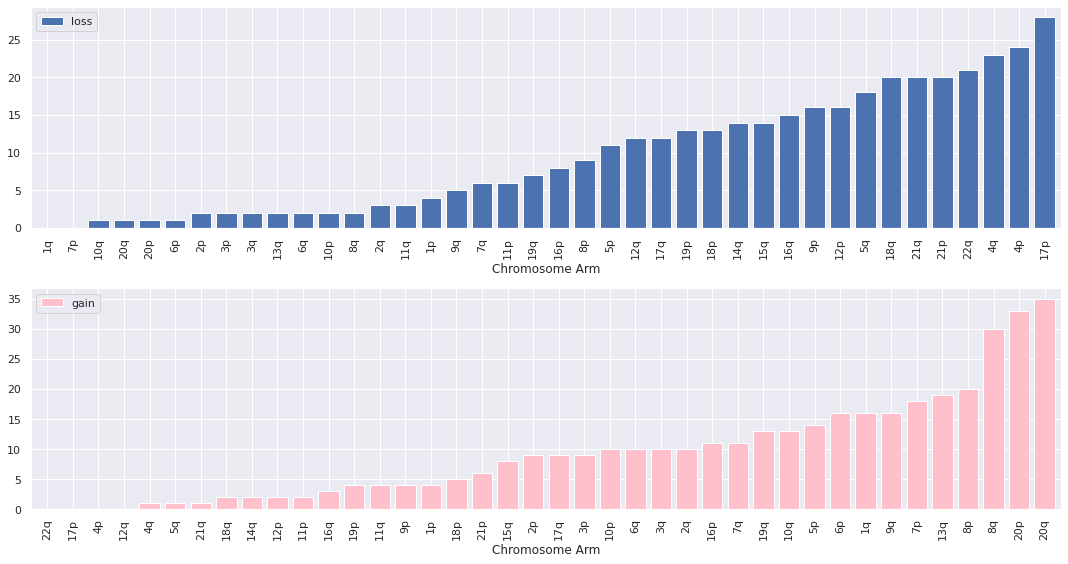

In [214]:
## Supplementary Figure 4A

fig,ax = plt.subplots(2,1,figsize=(15,8))
(arm_level.T.apply(lambda x: np.sum(x==-1))).sort_values().plot.bar(width=0.8,label="loss",ax=ax[0])
(arm_level.T.apply(lambda x: np.sum(x==1))).sort_values().plot.bar(width=0.8,label="gain",ax=ax[1],color="pink")

ax[0].legend()
ax[1].legend()
plt.tight_layout()

plt.rcParams['pdf.fonttype'] = 42
plt.savefig(figure_dir + "Supplementary Figure 4A.pdf")

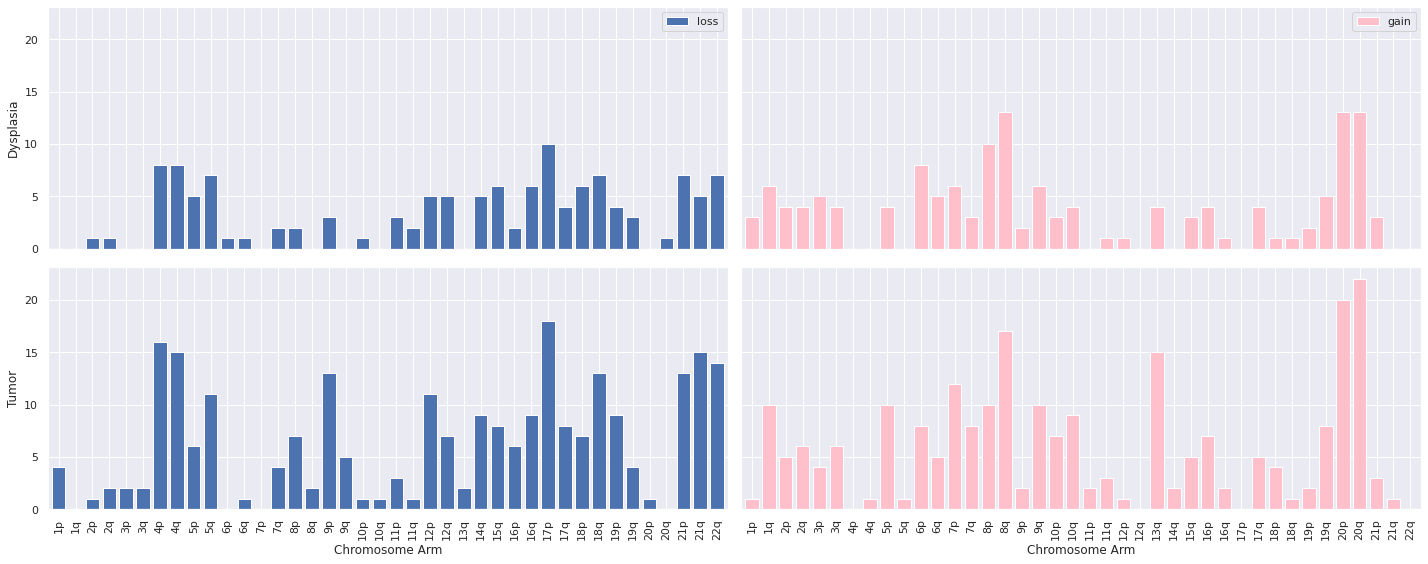

In [215]:
## Supplementary FIgure 4b

arm_level_Dys = arm_level.loc[:,arm_level.columns.str.contains('-D')]
arm_level_Tumor = arm_level.loc[:,arm_level.columns.str.contains('-T')]

fig,ax = plt.subplots(2,2,figsize=(20,8),sharex=True,sharey=True)
(arm_level_Dys.T.apply(lambda x: np.sum(x==-1)) ).plot.bar(width=0.8,label="loss",ax=ax[0,0])
(arm_level_Tumor.T.apply(lambda x: np.sum(x==-1))).plot.bar(width=0.8,label="loss",ax=ax[1,0])

(arm_level_Dys.T.apply(lambda x: np.sum(x==1))).plot.bar(width=0.8,label="gain",ax=ax[0,1],color="pink")
(arm_level_Tumor.T.apply(lambda x: np.sum(x==1))).plot.bar(width=0.8,label="gain",ax=ax[1,1],color="pink")


ax[0,0].set_ylabel("Dysplasia")
ax[1,0].set_ylabel("Tumor")

ax[0,0].legend()
ax[0,1].legend()

plt.tight_layout()

plt.rcParams['pdf.fonttype'] = 42
plt.savefig(figure_dir + "Supplementary Figure4B.pdf")

##### focal data

In [49]:
focal_data = pd.read_csv("/lustre/home/yzhou/GC_multi/GC_30/GC_Zhouyong/GC2/somatic/CNV/Tumor/gistic2_result/focal_data_by_genes.txt",sep="\t",
                         index_col=0)

In [144]:
focal_data.shape

(24055, 62)

In [51]:
focal_data_driver = focal_data[focal_data.index.isin(amp_genes + del_genes)].iloc[:,2:]

In [52]:
focal_data_driver_f = focal_data_driver.loc[~(focal_data_driver.sum(axis=1) == 0)]

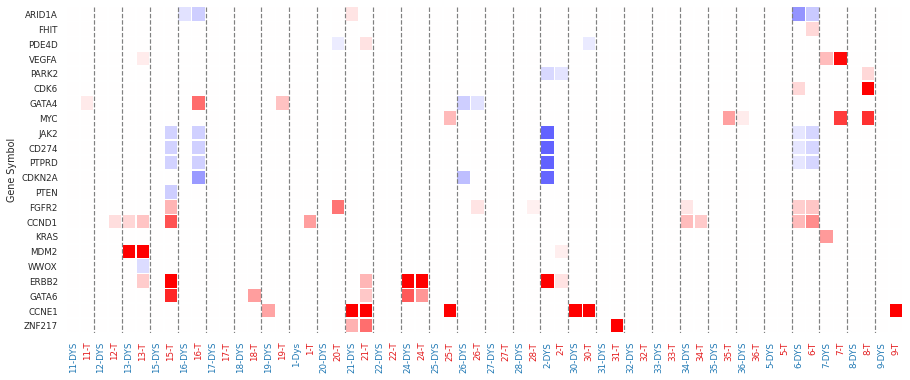

In [217]:
## Figuer 4B
sns.set_theme("paper")
sns.set_style("white")
fig,ax = plt.subplots(figsize=(15,6))

sns.heatmap(focal_data_driver_f,vmin=-2,vmax=2,cmap="bwr",cbar=False,linewidths=0.5,ax=ax)

for i,t in enumerate(ax.xaxis.get_ticklabels()):
    if i%2 == 0:
        t.set_color(sns.color_palette("Paired")[1])
    else:
        t.set_color(sns.color_palette("Paired")[5])


ax.vlines(np.arange(2,60,2) ,ymin= 0 ,ymax=40,color="grey",linestyles="dashed")

plt.rcParams['pdf.fonttype'] = 42
plt.savefig(figure_dir + "Figure3B.pdf")

# Mutational signatures

In [54]:
# Some samples have fewer than 50 mutations:
 ## 12-DYS, 18-DYS, 31-DYS
sigs = pd.read_csv("/lustre/home/yzhou/GC_multi/GC_30/GC_Zhouyong/GC2/somatic/Mutect2/deconstructsig/gc30_sample.txt",sep="\t")

In [55]:
sigs.columns = sigs.columns.str.replace("X","sig.")

In [56]:
sigs_T = sigs[sigs.index.str.contains("-T")]
sigs_D = sigs[sigs.index.str.contains("-D")]

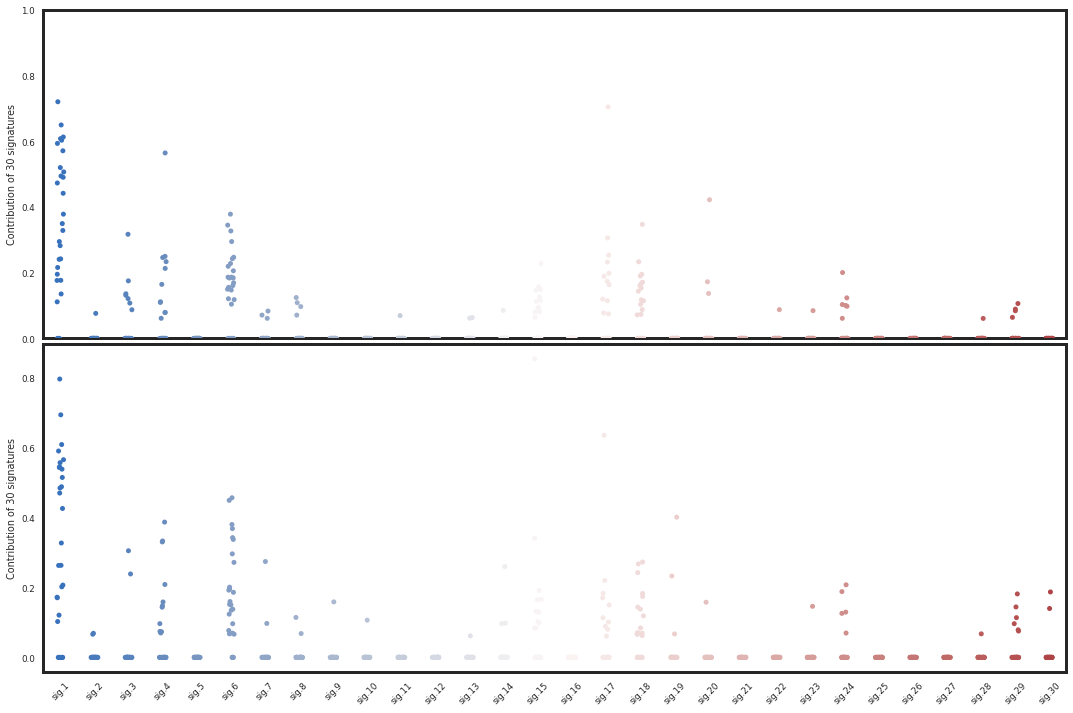

In [218]:
fig,ax = plt.subplots(2,1,figsize=(15,10))
sns.stripplot(x="variable",y="value",data=sigs_T.melt(),ax=ax[0],palette="vlag")
sns.stripplot(x="variable",y="value",data=sigs_D.melt(),ax=ax[1],palette="vlag")

for item in ax[0].get_xticklabels():
    item.set_rotation(45)

for axis in ['top','bottom','left','right']:
    ax[0].spines[axis].set_linewidth(3)

##sns.despine()
ax[0].set_ylabel("Contribution of 30 signatures")
ax[0].set_xlabel("")

ax[0].set_xticklabels("")
ax[0].set_ylim(0,1)
    
    
for item in ax[1].get_xticklabels():
    item.set_rotation(45)
    
for axis in ['top','bottom','left','right']:
    ax[1].spines[axis].set_linewidth(3)

##sns.despine()
ax[1].set_ylabel("Contribution of 30 signatures")
ax[1].set_xlabel("")
    
plt.tight_layout(h_pad=0.001)

plt.rcParams['pdf.fonttype'] = 42
plt.savefig(figure_dir + "Figure4A.pdf")

In [58]:
from scipy import stats
for i in np.arange(30):
    test = stats.ranksums(sigs_D.iloc[:,i],sigs_T.iloc[:,i])
    print(sigs_D.columns[i],test,sep="\t")

sig.1	RanksumsResult(statistic=-0.5765925913445669, pvalue=0.564214705145786)
sig.2	RanksumsResult(statistic=0.2069819558672804, pvalue=0.8360239504893114)
sig.3	RanksumsResult(statistic=-1.034909779336402, pvalue=0.30071104714831287)
sig.4	RanksumsResult(statistic=-0.0517454889668201, pvalue=0.9587314908134437)
sig.5	RanksumsResult(statistic=0.0, pvalue=1.0)
sig.6	RanksumsResult(statistic=0.36961063547728645, pvalue=0.7116726254873127)
sig.7	RanksumsResult(statistic=-0.1774131050290975, pvalue=0.8591839142744377)
sig.8	RanksumsResult(statistic=-0.4583171879918352, pvalue=0.6467245773434841)
sig.9	RanksumsResult(statistic=0.22176638128637186, pvalue=0.8244957516547711)
sig.10	RanksumsResult(statistic=0.22176638128637186, pvalue=0.8244957516547711)
sig.11	RanksumsResult(statistic=-0.22176638128637186, pvalue=0.8244957516547711)
sig.12	RanksumsResult(statistic=0.0, pvalue=1.0)
sig.13	RanksumsResult(statistic=-0.2365508067054633, pvalue=0.8130052876119973)
sig.14	RanksumsResult(statistic=

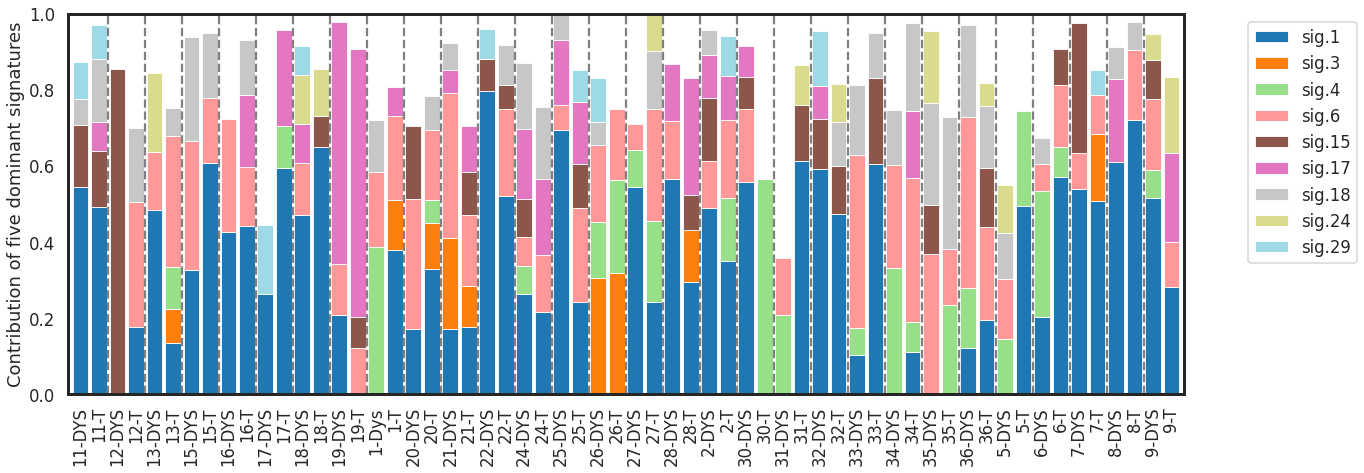

In [228]:
dominant = ["sig.1","sig.3","sig.4","sig.6","sig.15","sig.17","sig.18","sig.24","sig.29"]

##sigs.loc[:,~ix].plot.bar(stacked=True)
sns.set(font_scale=1.5,rc={'figure.facecolor':'white'})
sns.set_theme("talk")
sns.set_style("white")

ax = sigs[dominant].plot(kind="bar",stacked=True,figsize=(20,7),width=0.85,cmap="tab20",legend=False,linewidth=0.85)

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(3)

##sns.despine()
ax.set_ylabel("Contribution of five dominant signatures")
ax.set_xlabel("")

##ax.set_xticklabels(sigs.loc[:,~ix].index,fontsize=12)
ax.set_ylim(0,1)


plt.legend(bbox_to_anchor=(1.05,1))##,labels=["Aging","DMMR","signatue 17","BRCAness","Signature 18"])

ax.vlines(np.arange(2,60,2)-0.5,linestyles="dashed",color="grey",ymin=0,ymax=1)

plt.rcParams['pdf.fonttype'] = 42
plt.savefig(figure_dir + "Figure4B.pdf",bbox_inches="tight")

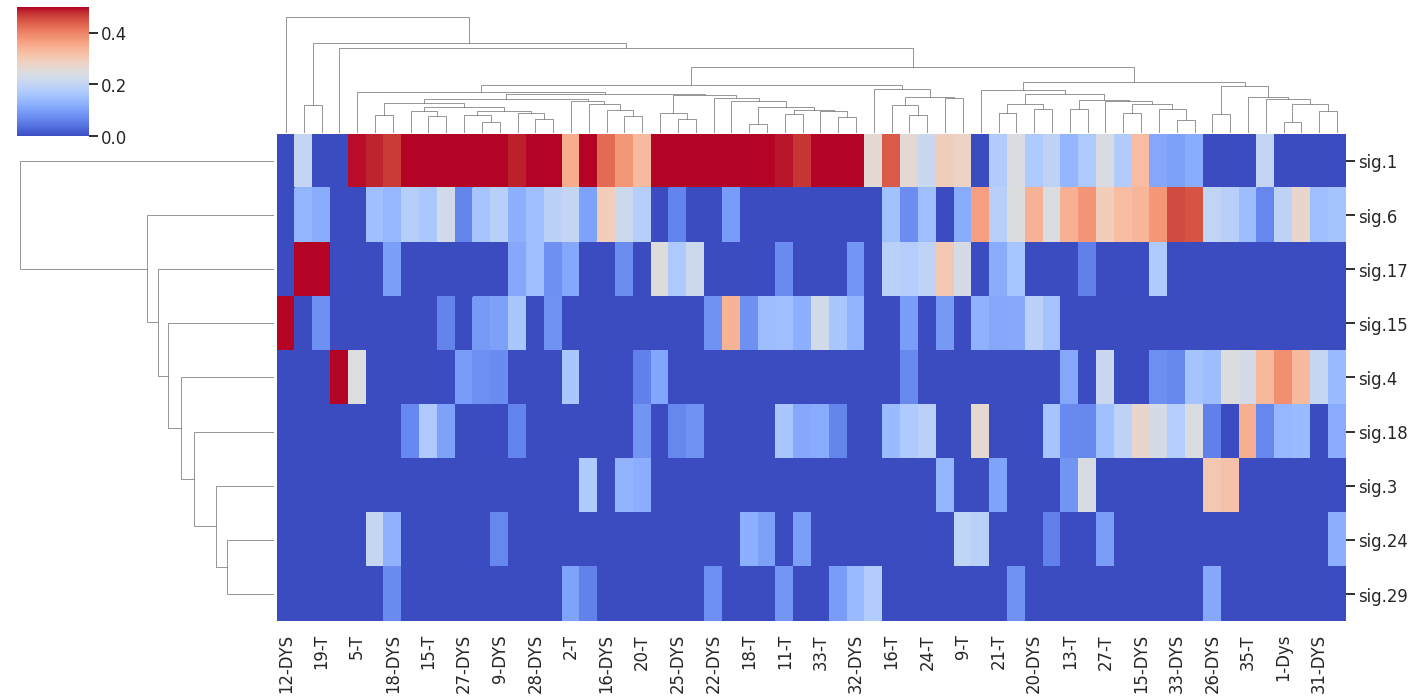

In [220]:
## Supplementary Figure 5

sns.set_theme("talk")
sns.clustermap(sigs[dominant].T,figsize=(20,10),cmap="coolwarm",vmin=0,vmax=0.5)

plt.rcParams['pdf.fonttype'] = 42
plt.savefig(figure_dir + "Supplementary Figure5.pdf")

/lustre/home/yzhou/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  after removing the cwd from sys.path.
/lustre/home/yzhou/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  
/lustre/home/yzhou/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor

([<matplotlib.patches.Wedge at 0x7f58008dd150>,
 [Text(-0.30786851543065047, 1.0560383407843332, ''),
  Text(-0.9276672312845952, -0.5911290113002181, ''),
  Text(-0.9276672312845952, -0.5911290113002181, ''),
  Text(-0.9276672312845952, -0.5911290113002181, ''),
  Text(-0.9276672312845952, -0.5911290113002181, ''),
  Text(-0.9276672312845952, -0.5911290113002181, ''),
  Text(-0.9276672312845952, -0.5911290113002181, ''),
  Text(-0.9276672312845952, -0.5911290113002181, ''),
  Text(-0.9276672312845952, -0.5911290113002181, ''),
  Text(-0.9276672312845952, -0.5911290113002181, ''),
  Text(-0.9276672312845952, -0.5911290113002181, ''),
  Text(-0.9276672312845952, -0.5911290113002181, ''),
  Text(-0.9276672312845952, -0.5911290113002181, ''),
  Text(-0.9276672312845952, -0.5911290113002181, ''),
  Text(-0.6120260174183823, -0.9140154014036055, ''),
  Text(-0.19325842123325848, -1.0828901987839896, ''),
  Text(0.11233278934250984, -1.0942492149590657, ''),
  Text(0.4092423449545175, -1.021

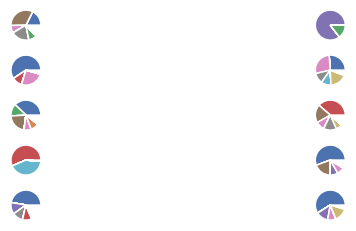

In [800]:
fig,ax = plt.subplots(5,2,figsize=(10,4))

#for i in np.arange(5):
ax[0,0].pie(sigs_T.loc["12-T",])
ax[0,1].pie(sigs_D.loc["12-DYS",])


ax[1,0].pie(sigs_T.loc["17-T",])
ax[1,1].pie(sigs_D.loc["17-DYS",])


ax[2,0].pie(sigs_T.loc["1-T",])
ax[2,1].pie(sigs_D.loc["1-Dys",])


ax[3,0].pie(sigs_T.loc["30-T",])
ax[3,1].pie(sigs_D.loc["30-DYS",])

ax[4,0].pie(sigs_T.loc["32-T",])
ax[4,1].pie(sigs_D.loc["32-DYS",])